<h1><center><b>Machine Learning</b></center></h1>
<h4><center>K-Means and PCA<center></h4>


<font>
Sagiv Antebi   
</font>


## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [121]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

Generate a 2D dataset

In [122]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

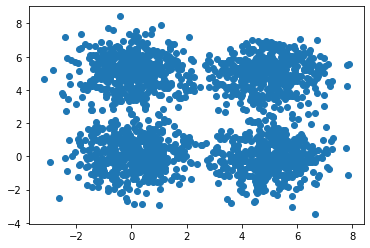

In [123]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [124]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
      n_samples, n_features = X.shape

      self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]

      for iter in range(self.max_iter):
        labels = self._get_labels(X)

        self.labels_history.append(labels)

        centroids = self._get_centroids(X, labels)

        self.centroids_history.append(self.centroids)

        cost = self._calculate_cost(X)

        self.costs.append(cost)

        if np.array_equal(centroids,self.centroids):
          break
        
        self.centroids = centroids

      self.X_fit_ = X
      self.labels_ = labels


    def predict(self, X):
        #### YOUR CODE HERE ####
        return None

    def _get_distances(self, X):
        #### YOUR CODE HERE ####
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
          distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances    


    def _get_labels(self, X):
        #### YOUR CODE HERE ####
        distances = self._get_distances(X)
        labels_arr = np.argmin(distances, axis=1)
        return labels_arr


    def _get_centroids(self, X, labels):
        #### YOUR CODE HERE ####
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            mean_label = np.mean(X[labels == i], axis=0)
            centroids[i] = mean_label
        return centroids



    def _calculate_cost(self, X):
        #### YOUR CODE HERE ####
        distances = self._get_distances(X)
        return np.sum(np.min(distances, axis=1) ** 2)
    
    def get_centroids_history(self):
      return self.centroids_history



Run the algorithm on the 2D dataset

In [125]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

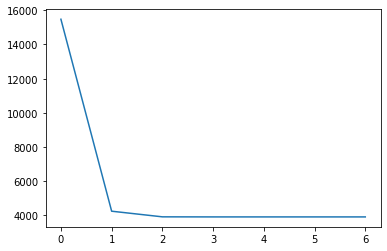

In [126]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16,489.97<br>
3 clusters: 10,289.13<br>
4 clusters: 3,939.35<br>
6 clusters: 3,273.32<br>
8 clusters: 2,759.04<br>
10 clusters: 2,133.19<br>
20 clusters: 1,160.79<br>

In [127]:
# # code just for me to understand it

# n_clusters = [2,3,4,6,8,10,20] 
# kmeans = []
# for num in n_clusters:
#   kmeans.append(KMeans(n_clusters=num))
#   kmeans[-1].fit(X)

# for i,model in enumerate(kmeans):
#   costs = model.costs
#   print("Number of clusters: " + str(model.n_clusters) + " | The cost: " + str(costs[-1]))

Now write a code that plots the clusters and the locations of the centroids at each iteration

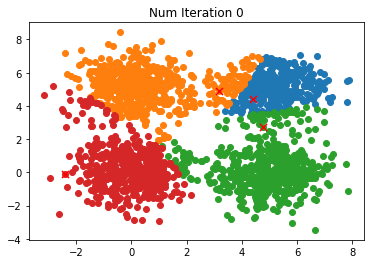

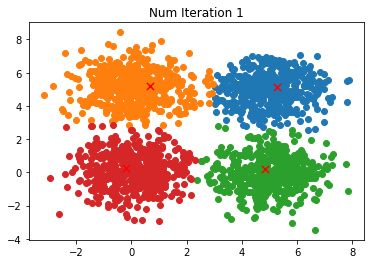

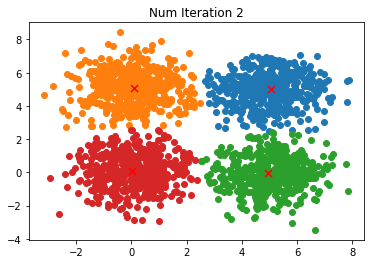

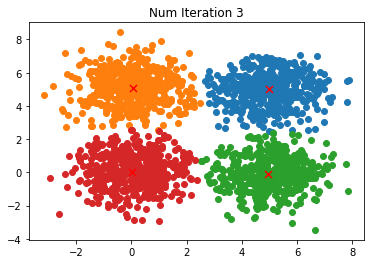

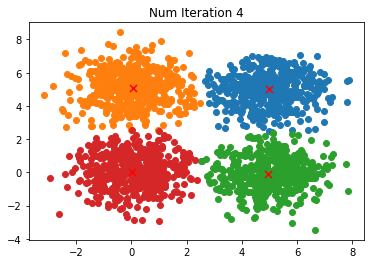

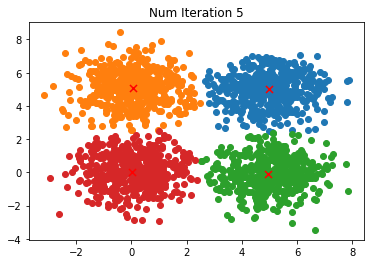

In [128]:
########################
#### YOUR CODE HERE ####
########################

centroids = kmeans.get_centroids_history()
labels = kmeans.labels_history

for i in range(len(centroids) - 1):
    for j in range(kmeans.n_clusters):
        plt.scatter(kmeans.X_fit_[labels[i] == j][:, 0], kmeans.X_fit_[labels[i] == j][:, 1])
    plt.scatter(centroids[i][:, 0], centroids[i][:, 1], marker='x',c='r', s=50)
    plt.title("Num Iteration " + str(i))
    plt.show()

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [129]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [130]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [131]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
      X_mean = np.mean(X, axis=0)
      X_centered = X - X_mean
      cov_matrix = np.cov(X_centered, rowvar=False)
      eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
      sorted_indices = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[sorted_indices]
      eigenvectors = eigenvectors[:, sorted_indices]
      self.V = eigenvectors
      return self.V

    def transform(self, X, n_dimentions):
        return np.dot(X, self.V[:, :n_dimentions])



Run the algorithm on MNIST dataset.

In [132]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

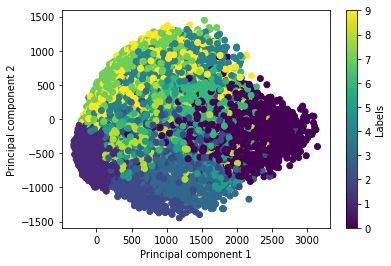

In [133]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

<ipython-input-134-f662d9eef91c>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im1 = ax1.imshow((V.T@V).astype(np.float))
<ipython-input-134-f662d9eef91c>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  im1 = ax1.imshow((V.T@V).astype(np.float))
<ipython-input-134-f662d9eef91c>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-no

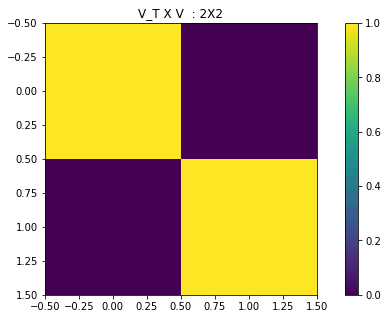

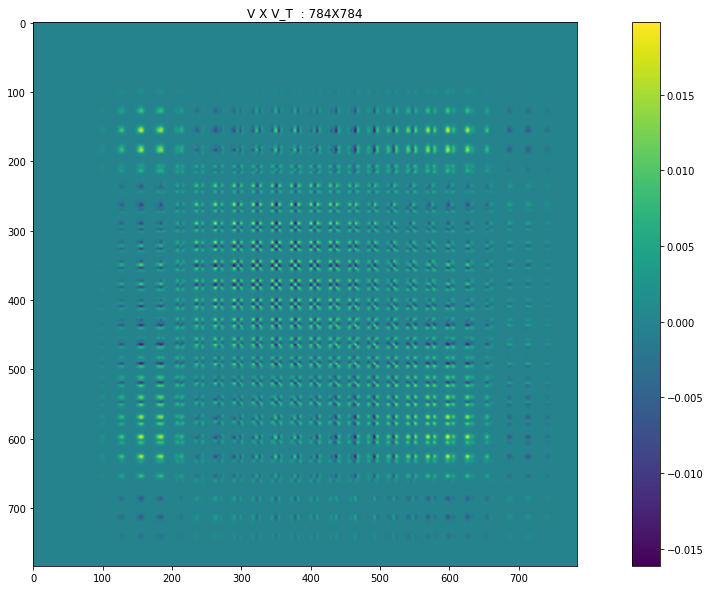

In [134]:
########################
#### YOUR CODE HERE ####
########################
V = pca.V[:, :2]
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(20, 10))
im1 = ax1.imshow((V.T@V).astype(np.float))
ax1.set_title("V_T X V  : 2X2")
fig1.colorbar(im1, ax=ax1)
im2 = ax2.imshow((V@V.T).astype(np.float))
ax2.set_title("V X V_T  : 784X784")
fig2.colorbar(im2, ax=ax2)

plt.show()

Your Explanation:
</br>
The VTV matrix contains the directions of the top two principal components. In VVT, only the top 2 principal components are used to reconstruct the data, resulting in a less accurate reconstruction.

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [135]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####
    x_proj = np.dot(x, V[:, :n_dimentions])
    x_reconstructed = np.dot(x_proj, V[:, :n_dimentions].T)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br>No, they are just similar, as you can see in the metric between the vectors<br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


In [136]:
########################
#### YOUR CODE HERE ####
########################
import random
rand_image = X[random.randint(0, len(X))]

for n_dim in [3, 10, 100]:
    plot_img = pca_reconstruction(rand_image, n_dim)
    print("For n_dim =", n_dim , "| The noorm is = " ,np.linalg.norm(rand_image - plot_img))

For n_dim = 3 | The noorm is =  1928.1869962220196
For n_dim = 10 | The noorm is =  1928.1869962220196
For n_dim = 100 | The noorm is =  1928.1869962220196
